## streaming churn and retention Analysis


**Introduction**

The idea of this project is to analyzes customer streaming behavior and how this influences if they may likely leave or still stay( continuing using the platform). I am  using exploratory data analysis and machine learning techniques to checkmate this. The objective is to build a predictive model that helps the streaming business proactively identify a likely leaving customers and design data driven retention strategies to improve customer lifetime value.


1. Importing the dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

 **Data loading**

 The customer streaming dataset is loaded into the notebook using pandas for analysis. The dataset contains customer demographic information, subscription details, engagement metrics, and the churn indicator used as the target variable for prediction. 

In [50]:
# load the data
df = pd.read_csv("../data/Streaming.csv")

In [51]:
df.shape

(5000, 12)

In [52]:
df.head()


,Customer_ID,Age,Gender,Subscription_Length,Region,Payment_Method,Support_Tickets_Raised,Satisfaction_Score,Discount_Offered,Last_Activity,Monthly_Spend,Churned
0,CUST000001,56.0,Male,54,South,PayPal,0,9.0,6.42,319,62.11,1
1,CUST000002,69.0,Female,21,East,Debit Card,1,2.0,13.77,166,37.27,1
2,CUST000003,46.0,Female,49,East,PayPal,3,8.0,19.91,207,61.82,0
3,CUST000004,32.0,Male,47,West,Debit Card,3,1.0,13.39,108,40.96,1
4,CUST000005,60.0,Male,6,East,Credit Card,2,NaN,13.18,65,45.97,0


In [53]:
pd.set_option("display.max_columns", None)

**Inspecting the data**

The dataset is inspected to examine column names, data types and also missing values.


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer_ID             5000 non-null   object 
 1   Age                     4500 non-null   float64
 2   Gender                  5000 non-null   object 
 3   Subscription_Length     5000 non-null   int64  
 4   Region                  5000 non-null   object 
 5   Payment_Method          5000 non-null   object 
 6   Support_Tickets_Raised  5000 non-null   int64  
 7   Satisfaction_Score      4500 non-null   float64
 8   Discount_Offered        5000 non-null   float64
 9   Last_Activity           5000 non-null   int64  
 10  Monthly_Spend           5000 non-null   float64
 11  Churned                 5000 non-null   int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 468.9+ KB


In [55]:
df.isna().sum()

Customer_ID                 0
Age                       500
Gender                      0
Subscription_Length         0
Region                      0
Payment_Method              0
Support_Tickets_Raised      0
Satisfaction_Score        500
Discount_Offered            0
Last_Activity               0
Monthly_Spend               0
Churned                     0
dtype: int64



**Dropping the customerID as it is not needed for the model**


In [56]:
df = df.drop(columns=["Customer_ID"])

**Confirming the column has been dropped**

In [57]:
df.head(2)

,Age,Gender,Subscription_Length,Region,Payment_Method,Support_Tickets_Raised,Satisfaction_Score,Discount_Offered,Last_Activity,Monthly_Spend,Churned
0,56.0,Male,54,South,PayPal,0,9.0,6.42,319,62.11,1
1,69.0,Female,21,East,Debit Card,1,2.0,13.77,166,37.27,1


**Printing the unique values for all the columns**

In [58]:
for col in df.columns:
    print(col, df[col].unique)
    print("-"*50)

Age <bound method Series.unique of 0       56.0
1       69.0
2       46.0
3       32.0
4       60.0
        ... 
4995    24.0
4996    66.0
4997    26.0
4998    53.0
4999    36.0
Name: Age, Length: 5000, dtype: float64>
--------------------------------------------------
Gender <bound method Series.unique of 0         Male
1       Female
2       Female
3         Male
4         Male
         ...  
4995      Male
4996    Female
4997    Female
4998    Female
4999    Female
Name: Gender, Length: 5000, dtype: object>
--------------------------------------------------
Subscription_Length <bound method Series.unique of 0       54
1       21
2       49
3       47
4        6
        ..
4995     5
4996    12
4997     1
4998    44
4999    22
Name: Subscription_Length, Length: 5000, dtype: int64>
--------------------------------------------------
Region <bound method Series.unique of 0       South
1        East
2        East
3        West
4        East
        ...  
4995     East
4996     East
4997 

checking class distibution for target column

In [59]:
print(df["Churned"].value_counts())

Churned
0    2760
1    2240
Name: count, dtype: int64


**Insights**

1. class imbalance identified in the target column
2. Customer_ID removed as it is not needed for model training


**Explorotary Data Analysis**

In [60]:
df.describe()

,Age,Subscription_Length,Support_Tickets_Raised,Satisfaction_Score,Discount_Offered,Last_Activity,Monthly_Spend,Churned
count,4500.000000,5000.000000,5000.000000,4500.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,43.582222,29.704400,2.037000,5.54600,12.458404,181.441400,46.619784,0.448000
std,14.969559,17.050336,1.422405,2.86929,4.325381,104.500951,9.522140,0.497338
min,18.000000,1.000000,0.000000,1.00000,5.000000,1.000000,-5.060000,0.000000
25%,31.000000,15.000000,1.000000,3.00000,8.700000,90.000000,39.897500,0.000000
50%,43.000000,29.000000,2.000000,6.00000,12.500000,182.000000,46.625000,0.000000
75%,56.000000,44.000000,3.000000,8.00000,16.190000,271.000000,53.210000,1.000000
max,69.000000,59.000000,9.000000,10.00000,20.000000,364.000000,137.310000,1.000000


**Numerical features analysis**

Understanding the distribution of the numerical data

In [61]:
def plot_histogram(df, column_name):
    plt.Figure(figsize=(5,3))
    sns.histplot(df[column_name], kde=True)
    plt.title(f"Distribution of {column_name}")

    col_mean = df[column_name].mean()
    col_median = df[column_name].median()

    plt.axvline(col_mean, color="red", linestyle="-", label="mean")
    plt.axvline(col_median, color="green", linestyle="-", label="median")

    plt.legend()
    plt.show()

    


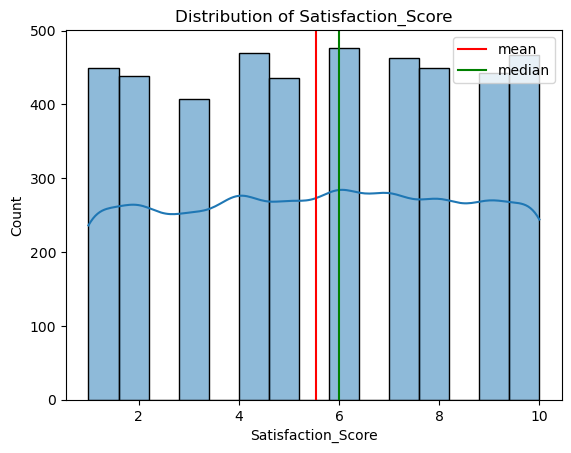

In [62]:
plot_histogram(df, "Satisfaction_Score")

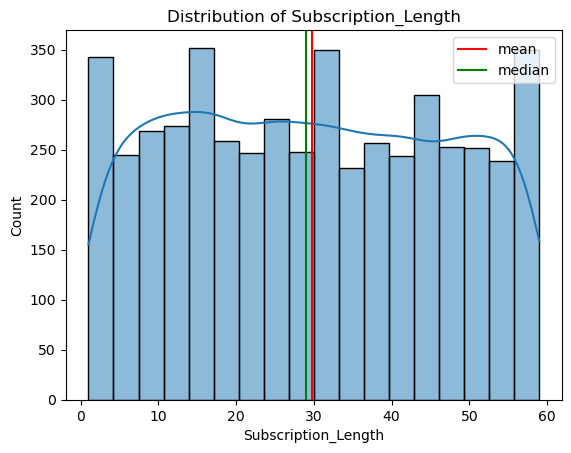

In [63]:
plot_histogram(df, "Subscription_Length")

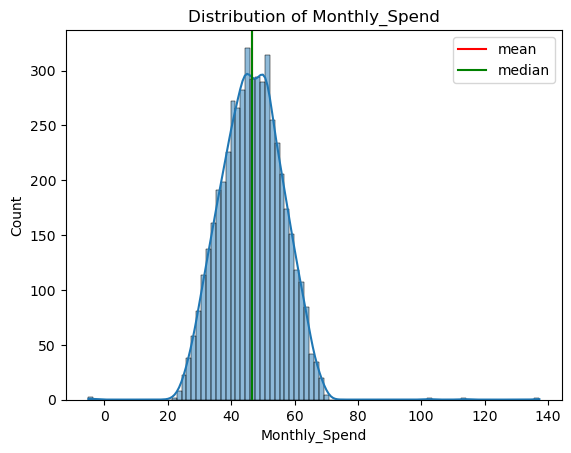

In [64]:
plot_histogram(df, "Monthly_Spend")

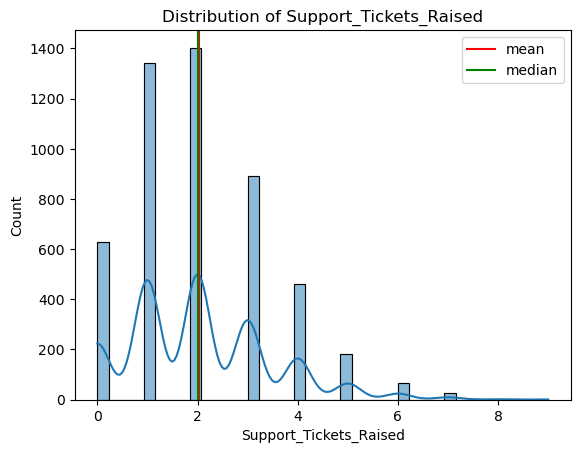

In [65]:
plot_histogram(df, "Support_Tickets_Raised")

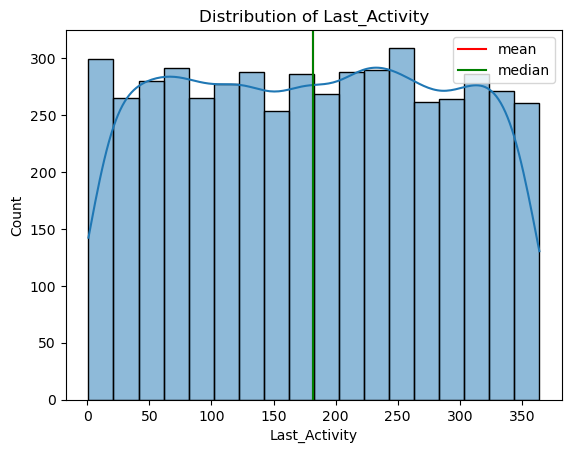

In [66]:
plot_histogram(df, "Last_Activity")

In [67]:
def box_plot(df, column_name):
    plt.Figure(figsize=(5,3))
    sns.boxplot(y=df[column_name])
    plt.title(f"Distribution of {column_name}")
    plt.ylabel(column_name)

    plt.show()

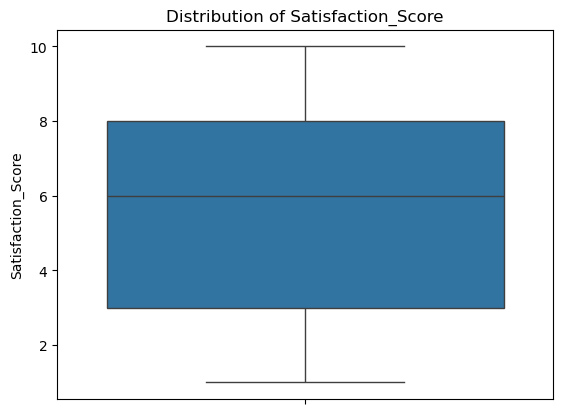

In [68]:
box_plot(df, "Satisfaction_Score")

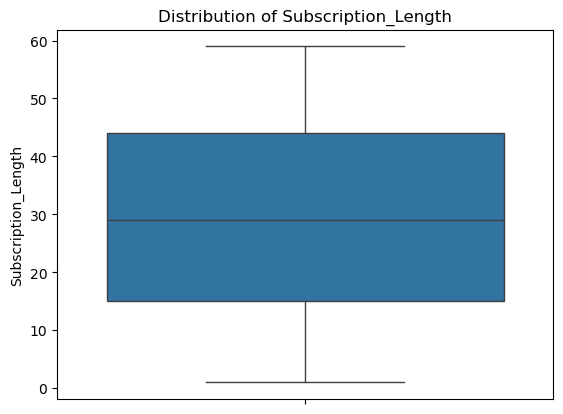

In [69]:
box_plot(df, "Subscription_Length")

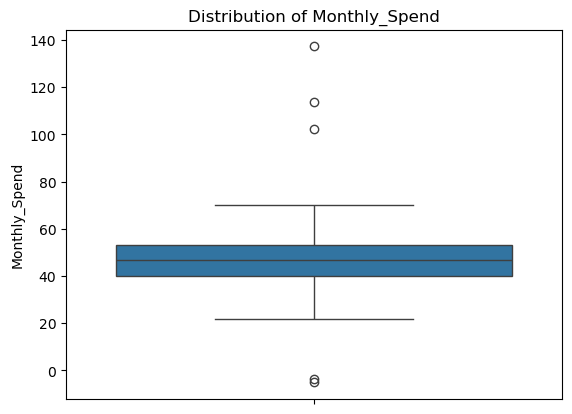

In [70]:
box_plot(df, "Monthly_Spend")

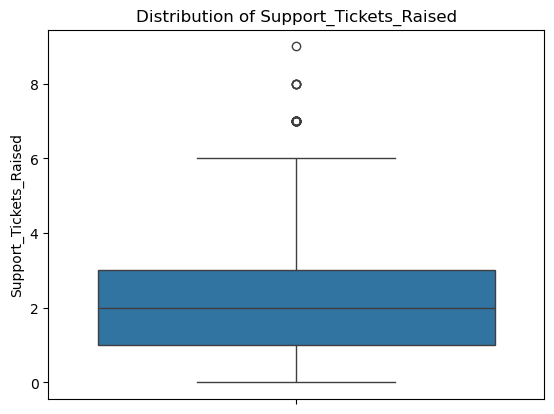

In [71]:
box_plot(df, "Support_Tickets_Raised")

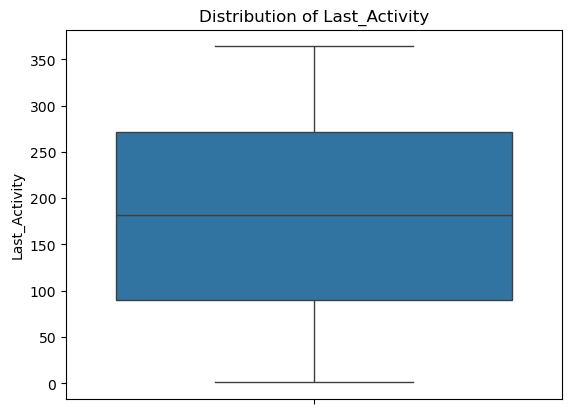

In [72]:
box_plot(df, "Last_Activity")

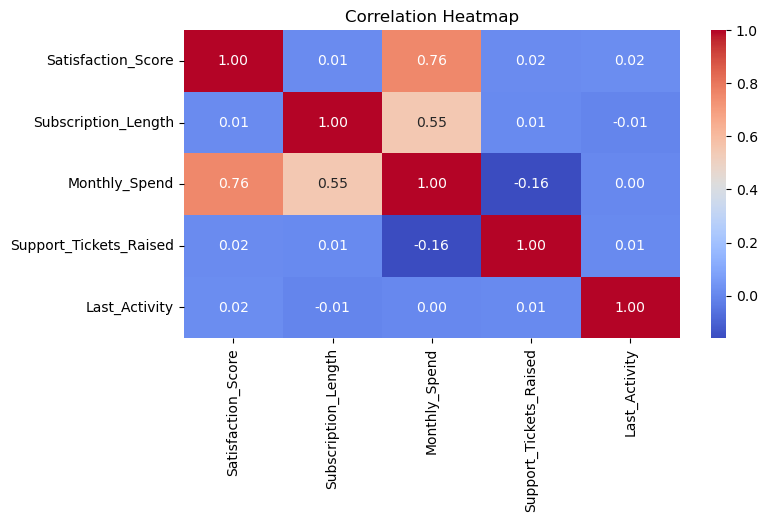

In [73]:
#correlation matrix - heatmap
plt.figure(figsize=(8,4))
sns.heatmap(df[["Satisfaction_Score", "Subscription_Length", "Monthly_Spend", "Support_Tickets_Raised","Last_Activity"]].corr(), annot=True, cmap="coolwarm",fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

categorical features- analysis

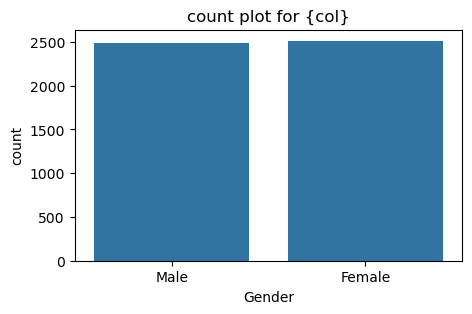

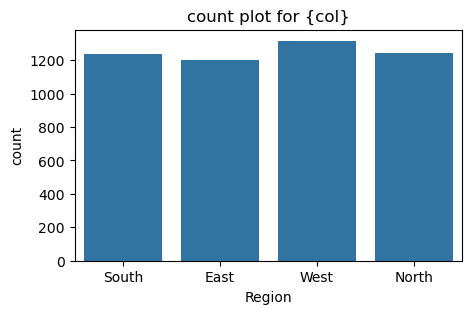

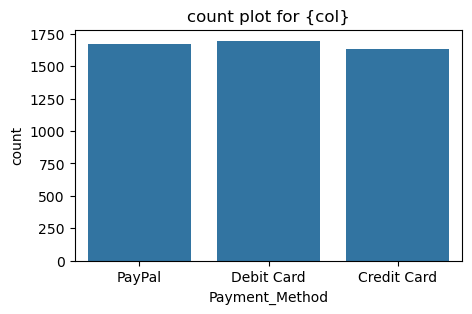

In [74]:
object_cols = df.select_dtypes(include="object").columns.to_list()

object_cols

for col in object_cols:
    plt.figure(figsize=(5,3))
    sns.countplot(x=df[col])
    plt.title("count plot for {col}")
    plt.show()

**Data preprocessing**

In [75]:
df.head(3)

,Age,Gender,Subscription_Length,Region,Payment_Method,Support_Tickets_Raised,Satisfaction_Score,Discount_Offered,Last_Activity,Monthly_Spend,Churned
0,56.0,Male,54,South,PayPal,0,9.0,6.42,319,62.11,1
1,69.0,Female,21,East,Debit Card,1,2.0,13.77,166,37.27,1
2,46.0,Female,49,East,PayPal,3,8.0,19.91,207,61.82,0


In [76]:
print(df["Churned"].value_counts())

Churned
0    2760
1    2240
Name: count, dtype: int64


**label encoding of categorical features**

In [77]:
object_columns = df.select_dtypes(include="object").columns

print(object_columns)

Index(['Gender', 'Region', 'Payment_Method'], dtype='object')


In [78]:
#initialize dictionary to save the encoders
import pickle
from sklearn.calibration import LabelEncoder


encoder = {}

#apply label encoding and store encoders
for column in object_columns:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])
    encoder[column] = label_encoder

#save encoders to a pickle file
with open("encoders.pkl", "wb") as f:
    pickle.dump(encoder, f)

In [79]:
encoder

{'Gender': LabelEncoder(),
 'Region': LabelEncoder(),
 'Payment_Method': LabelEncoder()}

In [80]:
df.head()

,Age,Gender,Subscription_Length,Region,Payment_Method,Support_Tickets_Raised,Satisfaction_Score,Discount_Offered,Last_Activity,Monthly_Spend,Churned
0,56.0,1,54,2,2,0,9.0,6.42,319,62.11,1
1,69.0,0,21,0,1,1,2.0,13.77,166,37.27,1
2,46.0,0,49,0,2,3,8.0,19.91,207,61.82,0
3,32.0,1,47,3,1,3,1.0,13.39,108,40.96,1
4,60.0,1,6,0,0,2,NaN,13.18,65,45.97,0


In [81]:
df['Churned'].value_counts(normalize=True) * 100

Churned
0    55.2
1    44.8
Name: proportion, dtype: float64

traning and test data split

In [82]:
#splitting the features and target
x = df.drop(columns=["Churned"])
y = df["Churned"]

In [83]:
#split training and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [84]:
print(y_train.shape)

(4000,)


In [85]:
#models

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

**Cross validation**

In [86]:
from sklearn.model_selection import cross_val_score

cv_scores = {}

for model_name, model in models.items():
    print(f"training{model} with default parameters")
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    cv_scores[model_name] = scores
    print(f" cross validation accuracy FOR {model_name} is {np.mean(scores)}")


trainingDecisionTreeClassifier(random_state=42) with default parameters
 cross validation accuracy FOR Decision Tree is 0.9899999999999999
trainingRandomForestClassifier(random_state=42) with default parameters
 cross validation accuracy FOR Random Forest is 0.99125
trainingXGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs

In [87]:
cv_scores

{'Decision Tree': array([0.99375, 0.99625, 0.98125, 0.99   , 0.98875]),
 'Random Forest': array([0.99375, 0.99625, 0.98625, 0.99   , 0.99   ]),
 'XGBoost': array([0.99625, 0.995  , 0.98375, 0.98875, 0.99375])}

XGBoost gives the highest compare to other model

In [88]:
from sklearn.metrics import classification_report

XGB_model = XGBClassifier(random_state=42)
XGB_model.fit(X_train, y_train)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


evaluate the model

In [89]:
y_pred = XGB_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       545
           1       1.00      0.99      0.99       455

    accuracy                           0.99      1000
   macro avg       1.00      0.99      0.99      1000
weighted avg       1.00      0.99      0.99      1000



**Save the trained data**

In [90]:
model_data = {
    "model": XGB_model,
    "features_names": X_train.columns.tolist()
}

with open("streaming_churn_model.pkl", "wb") as f:
    pickle.dump(model_data, f)

load the saved mode so you can predict

In [91]:
with open("streaming_churn_model.pkl", "rb") as f:
    model_data = pickle.load(f)

loaded_model = model_data["model"]
features = model_data["features_names"]

In [92]:
# print the model

print(loaded_model)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)


In [93]:
#check features name
print(features)

['Age', 'Gender', 'Subscription_Length', 'Region', 'Payment_Method', 'Support_Tickets_Raised', 'Satisfaction_Score', 'Discount_Offered', 'Last_Activity', 'Monthly_Spend']


In [94]:
df.head()

,Age,Gender,Subscription_Length,Region,Payment_Method,Support_Tickets_Raised,Satisfaction_Score,Discount_Offered,Last_Activity,Monthly_Spend,Churned
0,56.0,1,54,2,2,0,9.0,6.42,319,62.11,1
1,69.0,0,21,0,1,1,2.0,13.77,166,37.27,1
2,46.0,0,49,0,2,3,8.0,19.91,207,61.82,0
3,32.0,1,47,3,1,3,1.0,13.39,108,40.96,1
4,60.0,1,6,0,0,2,NaN,13.18,65,45.97,0


In [95]:
input_data = pd.DataFrame([{
    'Age': 30,
    'Gender': 1,                    
    'Subscription_Length': 12,     
    'Region': 2,                   
    'Payment_Method': 1,         
    'Support_Tickets_Raised': 3,    
    'Satisfaction_Score': 4,        
    'Discount_Offered': 10.0,    
    'Last_Activity': 30,            
    'Monthly_Spend': 50.0           
}])




prediction = loaded_model.predict(input_data)
prediction_probability = loaded_model.predict_proba(input_data)

print(prediction)

print("Churned" if prediction[0] == 1 else "Not Churned")

print(prediction)

print(prediction_probability)

[0]
Not Churned
[0]
[[9.9997443e-01 2.5577096e-05]]
